<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#「Pythonによるデータ科学入門」 DAY 5 のスライド中のコード

In [ ]:
# coding: utf-8
import numpy as np

def submatrix(i,j,A):
    return np.delete(np.delete(A, i, axis=0), j, axis=1)

# cofactor expansion
def determinant(A,level):
    n=A.shape[0]
    if n==1:
        return A[0,0]
    det=''
    for i in range(n):
        sign=''
        if i%2==1:
            sign= '-'
        elif len(det)>0:
            sign = '+'
        subdet = determinant(submatrix(i,0,A),level+1) 
        if len(subdet)==1:
            det = det + sign +  A[i,0] + '*' + subdet
        else:
            if level%3==0:
                left='[' ; right=']'
            elif level%3==1:
                left='{' ; right='}'
            else:
                left='(' ; right=')'
            det = det + sign +  A[i,0] + '*' + left + subdet + right
    return det

# メイン部
X=np.array([
        ['a','b','c','d'],
        ['e','f','g','h'],
        ['i','j','k','l'],
        ['m','n','o','p']])
d=determinant(X,0)
print(d)

a*[f*{k*p-o*l}-j*{g*p-o*h}+n*{g*l-k*h}]-e*[b*{k*p-o*l}-j*{c*p-o*d}+n*{c*l-k*d}]+i*[b*{g*p-o*h}-f*{c*p-o*d}+n*{c*h-g*d}]-m*[b*{g*l-k*h}-f*{c*l-k*d}+j*{c*h-g*d}]


In [ ]:
# coding: utf-8
from sympy import *

init_printing()

a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols("a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p")

X=Matrix([
        [a,b,c,d],
        [e,f,g,h],
        [i,j,k,l],
        [m,n,o,p]])


print(det(X))


a*f*k*p - a*f*l*o - a*g*j*p + a*g*l*n + a*h*j*o - a*h*k*n - b*e*k*p + b*e*l*o + b*g*i*p - b*g*l*m - b*h*i*o + b*h*k*m + c*e*j*p - c*e*l*n - c*f*i*p + c*f*l*m + c*h*i*n - c*h*j*m - d*e*j*o + d*e*k*n + d*f*i*o - d*f*k*m - d*g*i*n + d*g*j*m


In [ ]:
# coding: utf-8

import math
import numpy as np
import pandas as pd

data = pd.read_csv('rakuten.csv')

wt = data['体重'].tolist()
ht = data['身長'].tolist()
age = data['年齢'].tolist()
wage = list(map(math.log10,data['推定年俸'].tolist()))

# 正規化
wt = (wt - np.mean(wt))/np.std(wt)
ht = (ht - np.mean(ht))/np.std(ht)
age = (age - np.mean(age))/np.std(age)
# 行列にまとめる
X = np.vstack([wt, ht, age])

# 縦ベクトルに変換
wage = np.array([wage]).T

# 係数の推定（最小二乗法）
XXT = X.dot(X.T)
a = np.linalg.inv(XXT).dot(X).dot(wage)

print(a)


[[ 0.19957058]
 [-0.15708865]
 [ 0.18860879]]


In [ ]:
# coding: utf-8                                                                                                                                                                        

import math
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

linreg = linear_model.LinearRegression()

data = pd.read_csv('rakuten.csv')

wt = data['体重'].tolist()
ht = data['身長'].tolist()
age = data['年齢'].tolist()
wage = list(map(math.log10,data['推定年俸'].tolist()))

# 行列にまとめる（row=observation）                                                                                                                                                    
X = np.vstack([wt, ht, age]).T
# 標準化                                                                                                                                                                 
X = StandardScaler().fit_transform(X)

y = wage[:]

linreg.fit(X,y)

print(linreg.coef_)

[ 0.19957058 -0.15708865  0.18860879]


[[ 0.19957058]
 [-0.15708865]
 [ 0.18860879]]


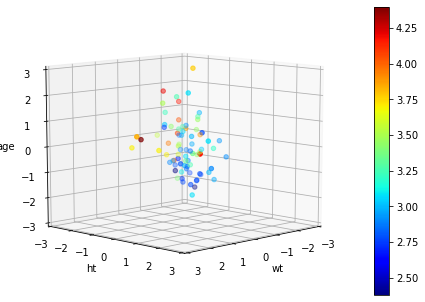

In [ ]:
# coding: utf-8

import math
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

data = pd.read_csv('rakuten.csv')

wt = data['体重'].tolist()
ht = data['身長'].tolist()
age = data['年齢'].tolist()
wage = list(map(math.log10,data['推定年俸'].tolist()))

# 色付け用
col=wage[:]

# 正規化
wt = (wt - np.mean(wt))/np.std(wt)
ht = (ht - np.mean(ht))/np.std(ht)
age = (age - np.mean(age))/np.std(age)
# 行列にまとめる
X = np.vstack([wt, ht, age])

# 縦ベクトルに変換
wage = np.array([wage]).T

# 係数の推定（最小二乗法）
XXT = X.dot(X.T)
a = np.linalg.inv(XXT).dot(X).dot(wage)

print(a)

fig=plt.figure()
ax=Axes3D(fig)
scplt=ax.scatter3D(wt, ht, age, c=col, cmap=plt.cm.jet)
ax.set_xlabel("wt")
ax.set_ylabel("ht")
ax.set_zlabel("age")
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)
ax.view_init(elev=10, azim=45)
plt.colorbar(scplt)
plt.show()


[ 7.60661982e-04 -4.18635565e-02  1.30154999e+00 -6.01647911e+00]
RSS= 19.792607370411968


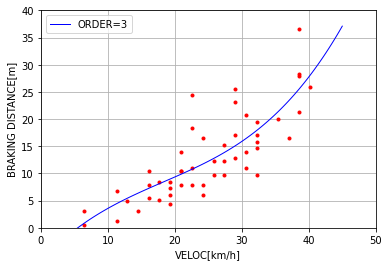

In [ ]:
# coding: utf-8

import scipy
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [6.4,0.6],[6.4,3.0],[11.3,1.2],[11.3,6.7],[12.9,4.9],[14.5,3.0],[16.1,5.5],[16.1,7.9],
    [16.1,10.4],[17.7,5.2],[17.7,8.5],[19.3,4.3],[19.3,6.1],[19.3,7.3],[19.3,8.5],
    [20.9,7.9],[20.9,10.4],[20.9,10.4],[20.9,14.0],[22.5,7.9],[22.5,11.0],[22.5,18.3],
    [22.5,24.4],[24.2,6.1],[24.2,7.9],[24.2,16.5],[25.8,9.8],[25.8,12.2],[27.4,9.8],
    [27.4,12.2],[27.4,15.2],[29.0,12.8],[29.0,17.1],[29.0,23.2],[29.0,25.6],[30.6,11.0],
    [30.6,14.0],[30.6,20.7],[32.2,9.8],[32.2,14.6],[32.2,15.8],[32.2,17.1],[32.2,19.5],
    [35.4,20.1],[37.0,16.5],[38.6,21.3],[38.6,28.0],[38.6,28.3],[38.6,36.6],[40.2,25.9]])

N=data.shape[0]

n=3

veloc = data[:,0]
dist = data[:,1]

param = np.polyfit(veloc, dist, n)
print(param)
func = np.poly1d(param)

rss = np.sum( np.square(func(veloc)-dist) ) / N
print('RSS=',rss)

v = np.linspace(5,45,100)
fitted_curve=func(v)

plt.plot(veloc,dist, '.', color=(1.0,0,0.0), linewidth=1.0)
plt.plot(v,fitted_curve, '-', color=(0.0,0,1.0), linewidth=1.0,label="ORDER="+str(n))
plt.xlabel('VELOC[km/h]')
plt.xlim(0,50)
plt.ylabel('BRAKING DISTANCE[m]')
plt.ylim(0,40)
plt.grid(True)
plt.legend()
plt.show()


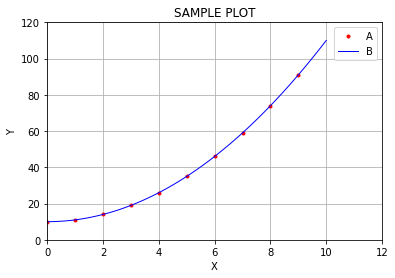

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.square(x) + 10

func = np.poly1d([1,0,10])

v = np.linspace(0,10,100)
curve=func(v)

plt.plot(x,y, '.', color=(1.0,0,0.0), linewidth=1.0,label="A")
plt.plot(v,curve, '-',color=(0.0,0,1.0),linewidth=1.0,label="B")
plt.title('SAMPLE PLOT')
plt.xlabel('X')
plt.xlim(0,12)
plt.ylabel('Y')
plt.ylim(0,120)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# coding: utf-8
import numpy as np
from scipy import optimize

def model_func(params, x, y):
    c0 = params[0]
    c1 = params[1]
    c2 = params[2]
    res = y - (c0 + c1*x + c2*x**2)
    return res

data = np.loadtxt('mtcars-mpg-wt.txt')
x = data[:,1] # weight (1000 lb)
y = data[:,0] # MPG
init_params=[20,0,0]
result = optimize.leastsq(model_func,init_params,args=(x,y))
print('c=',result[0])

c= [ 49.93081141 -13.38033736   1.17108693]
